<a href="https://colab.research.google.com/github/JasmineGonzalez2021/Computational-Modeling/blob/master/Q3_Learning_Goals_Reflection_Jasmine_Gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview

Each of the below sections contains code that correlates to the specific learning goal and my reflection on it, synthesizing the most relevant/composite example for me to demonstrate mastery of each topic for simplicity's sake. My weekly Colabs, linked in my Q3 [Weblog](https://docs.google.com/document/d/1Cwra6OsLoNMALfbiLbYOotl8T_eVfqL-47zYzbkQZ6E/edit?usp=sharing), can provide more examples of this mastery if necessary.

Please **run all cells in this colab**, as the some of the code in later sections builds off of that in earlier ones.

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
import urllib
import os
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import mpl_toolkits.mplot3d.axes3d as p3
import colorsys
from PIL import Image
from urllib.request import urlopen
from six.moves import urllib
from google.colab import drive
from operator import itemgetter 
import seaborn as sns
from matplotlib.image import imread

#Learning Goal 3.2

Below is an example of linear regression. This plots the linear relationship between two variables and makes predictions based off of that.

In [23]:
web_file = urllib.request.urlopen("http://onlinestatbook.com/mobile/case_studies/data/sat.txt")
data = np.loadtxt(web_file, encoding='utf-8', delimiter = " ", skiprows = 1)
print(data)

[[  3.45 643.   589.     3.76   3.52]
 [  2.78 558.   512.     2.87   2.91]
 [  2.52 583.   503.     2.54   2.4 ]
 [  3.67 685.   602.     3.83   3.47]
 [  3.24 592.   538.     3.29   3.47]
 [  2.1  562.   486.     2.64   2.37]
 [  2.82 573.   548.     2.86   2.4 ]
 [  2.36 559.   536.     2.03   2.24]
 [  2.42 552.   583.     2.81   3.02]
 [  3.51 617.   591.     3.41   3.32]
 [  3.48 684.   649.     3.61   3.59]
 [  2.14 568.   592.     2.48   2.54]
 [  2.59 604.   582.     3.21   3.19]
 [  3.46 619.   624.     3.52   3.71]
 [  3.51 642.   619.     3.41   3.58]
 [  3.68 683.   642.     3.52   3.4 ]
 [  3.91 703.   684.     3.84   3.73]
 [  3.72 712.   652.     3.64   3.49]
 [  2.15 564.   501.     2.14   2.25]
 [  2.48 557.   549.     2.21   2.37]
 [  3.09 591.   584.     3.17   3.29]
 [  2.71 599.   562.     3.01   3.19]
 [  2.46 607.   619.     3.17   3.28]
 [  3.32 619.   558.     3.01   3.37]
 [  3.61 700.   721.     3.72   3.61]
 [  3.82 718.   732.     3.78   3.81]
 [  2.64 580

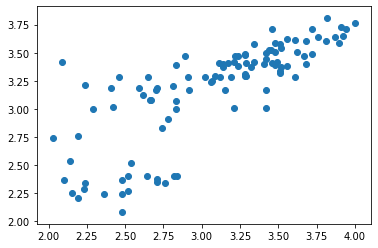

In [26]:
hs_gpa = data[:, 0]
col_gpa = data[:, 4]
plt.scatter(hs_gpa, col_gpa)

In [0]:
hs_gpa = hs_gpa.reshape(-1, 1)
col_gpa = col_gpa.reshape(-1, 1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(hs_gpa, col_gpa, test_size=0.25, random_state=0)
LinearRegr = LinearRegression()
LinearRegr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred = LinearRegr.predict(x_test)
y_pred

array([[2.88747027],
       [3.2849546 ],
       [2.8079734 ],
       [3.31807829],
       [3.31145355],
       [3.26508038],
       [3.7288121 ],
       [3.62944101],
       [3.21870721],
       [2.73510127],
       [3.47044728],
       [3.2518309 ],
       [3.01996504],
       [3.43069885],
       [2.70197758],
       [3.49694624],
       [2.76822497],
       [3.53006993],
       [3.78843475],
       [2.74172601],
       [3.0133403 ],
       [3.31807829],
       [3.56981836],
       [3.44394833],
       [3.60294206],
       [3.53669467],
       [3.00671556]])

In [43]:
y_test

array([[2.4 ],
       [3.38],
       [2.4 ],
       [3.41],
       [3.48],
       [3.01],
       [3.73],
       [3.64],
       [3.4 ],
       [3.19],
       [3.37],
       [3.28],
       [2.4 ],
       [3.71],
       [2.24],
       [3.62],
       [3.28],
       [3.61],
       [3.76],
       [3.02],
       [3.39],
       [3.29],
       [3.47],
       [3.39],
       [3.71],
       [3.51],
       [2.4 ]])

In [53]:
total = y_test.shape[0]
rights = 0
for n in range(total):
  if abs(y_pred[n] - y_test[n]) <= 0.1:
    rights = rights + 1
print(total)
print(rights)

27
11


In [55]:
perc_correct = (rights/total) * 100
print("The linear regressor predicted " + str(np.round(perc_correct, 2)) + "% of the data correctly!")

The linear regressor predicted 40.74% of the data correctly!


Below is an example of logistic regression. This takes a number of inputs and correlates them to one of a discrete set of outputs.

In [0]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print("Wine Data Shape" , wine.data.shape)
print("Label Data Shape", wine.target.shape)

Wine Data Shape (178, 13)
Label Data Shape (178,)


In [4]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [6]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=0)
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
print(logisticRegr.predict(x_test[3].reshape(1,-1)))
print(logisticRegr.predict(x_test[0:10]))

[0]
[0 2 1 0 1 1 0 2 1 1]


In [13]:
predictions = logisticRegr.predict(x_test)
predictions

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1])

In [14]:
y_test

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1])

In [15]:
total = y_test.shape[0]
rights = 0
for n in range(total):
  if predictions[n] == y_test[n]:
    rights = rights + 1
print(total)
print(rights)

45
42


In [16]:
perc_correct = (rights/total) * 100
print("The logistic regressor predicted " + str(np.round(perc_correct, 2)) + "% of the data correctly!")

The logistic regressor predicted 93.33% of the data correctly!


Below is an example of KMeans clustering. This is where data is randomly generated and then clustered into groups that are deemed alike based on their relative proximity to one another. 

[[-8.39397734 -2.9941727 ]
 [ 1.15870849  9.2744755 ]
 [ 3.51245066  7.0904625 ]]


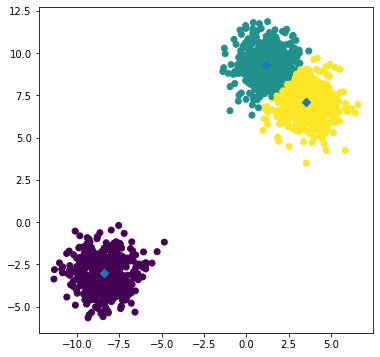

In [19]:
n_samples = 500
random_state = 2500
numCenters = 12

predictedClusters = 3
clusterMaker = KMeans(n_clusters=predictedClusters, random_state=random_state)
y_pred = clusterMaker.fit_predict(X)
centers = clusterMaker.cluster_centers_
print(centers)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.scatter(centers[:,0], centers[:,1], marker = 'D')

Below is an example of a neural network. This is where a large number of inputs fed into the system each become a neuron attached to a series of weights and biases such that the error is minimized moving through the hidden layers of the neural network to return a value from a discrete set of outputs.

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=names)

In [58]:
irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
X = irisdata.iloc[:, 0:4]
y = irisdata.select_dtypes(include=[object])
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

In [61]:
y.Class.unique()

array([0, 1, 2])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [65]:
predictions = mlp.predict(X_test)
predictions

array([1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0,
       2, 1, 2, 2, 1, 0, 2, 1])

In [66]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

